<a href="https://colab.research.google.com/github/ponnavishal/AI-Based-Moving-Vehicle-Registration-Plate-Detection-System/blob/main/Soft_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive for data sets

#Experiment No.2
#####AIM: Build a fully connected layer architecture using in-built data sets



In [2]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
#Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Function to display images in a grid
def display_sample_images(images, labels, num_samples=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

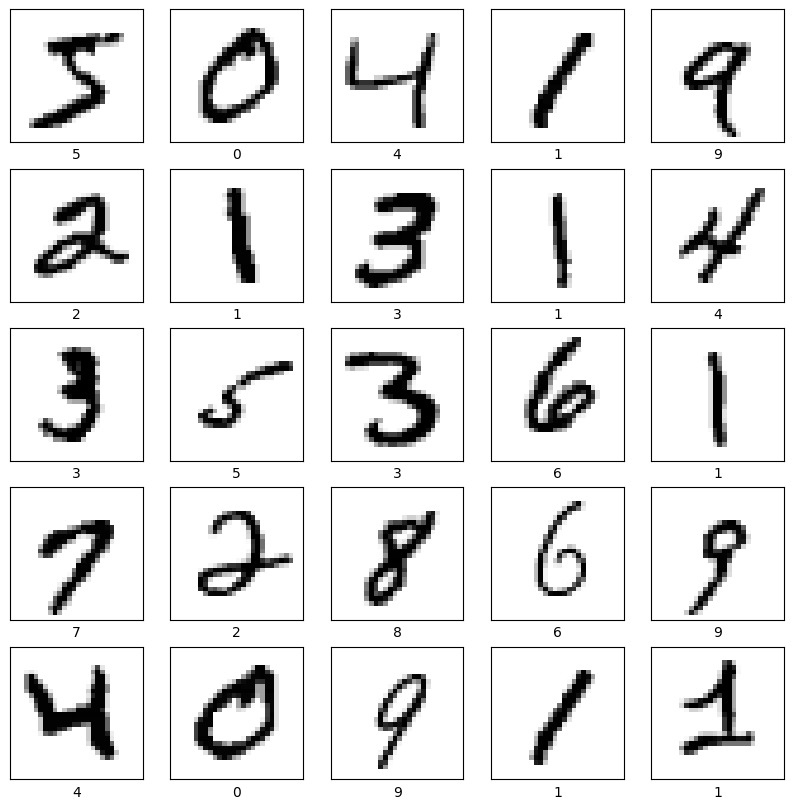

In [6]:
# Display 25 sample images from the training set
display_sample_images(train_images, train_labels, num_samples=25)

In [7]:
# Normalize the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [8]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [10]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8567 - loss: 0.4885 - val_accuracy: 0.9670 - val_loss: 0.1109
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9710 - loss: 0.0979 - val_accuracy: 0.9712 - val_loss: 0.0880
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9812 - loss: 0.0601 - val_accuracy: 0.9701 - val_loss: 0.1019
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9864 - loss: 0.0413 - val_accuracy: 0.9693 - val_loss: 0.1108
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9775 - val_loss: 0.0808
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9730 - val_loss: 0.1046
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9740 - val_loss: 0.1072
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9930 - loss: 0.0217 - val_acc

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9692 - loss: 0.1422
Test accuracy: 0.9749000072479248


#Experiment No.3
#####AIM: Creating an Artificial Neural Network Class.

a) Training the model

b) Applying the Sigmoid function Theory

In [ ]:
import numpy as np

 The neural network is a single-layer (also known as a single perceptron) that is trained using a basic form of supervised learning called gradient descent.

In [ ]:
class NeuralNetwork():
    def __init__(self):
        # seeding for random number generation
        np.random.seed(1)
        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via the neuron
            output = self.think(training_inputs)
            #computing error rate for back-propagation
            error = training_outputs - output
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
            #The neural network is a single-layer (also known as a single perceptron) that is trained using a basic form of supervised learning called gradient descent.

    def think(self, inputs):
      #passing the inputs via the neuron to get output
      #converting values to floats
      inputs = inputs.astype(float)
      output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
      return output

In [ ]:
if __name__ == "__main__":
    #initializing the neuron class
    neural_network = NeuralNetwork()
    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)
    #training data consisting of 4 examples--3 input values and 1 output
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    #training taking place
    neural_network.train(training_inputs, training_outputs, 15000)
    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)
    #user input
    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Done!")

Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
User Input One: 1
User Input Two: 2
User Input Three: 1
Considering New Situation:  1 2 1
New Output data: 
[0.99212318]
Done!


#Experiment No.4
#####AIM: Write a program to build a Convolution Neural network.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
# the data, split between train and train test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 153s 320ms/step - accuracy: 0.1211 - loss: 34.5933 - val_accuracy: 0.4411 - val_loss: 4.1475
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 324ms/step - accuracy: 0.2294 - loss: 13.8196 - val_accuracy: 0.5537 - val_loss: 1.7636
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - accuracy: 0.2965 - loss: 6.7124 - val_accuracy: 0.5267 - val_loss: 1.3987
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 324ms/step - accuracy: 0.3138 - loss: 3.9511 - val_accuracy: 0.4636 - val_loss: 1.5679
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 320ms/step - accuracy: 0.3118 - loss: 2.8086 - val_accuracy: 0.4357 - val_loss: 1.7066
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 321ms/step - accuracy: 0.3096 - loss: 2.4093 - val_accuracy: 0.4271 - val_loss: 1.7559
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 320ms/step - accuracy: 0.3141 - loss: 2.2238 - val_accuracy: 0.4401 - val_loss: 1.7449
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 331ms/step - accuracy: 0.3307

#Experiment No.5
#####AIM: Write a program to implement Multi Layer Perceptron.

In [ ]:
# One-hot encode the target output
!pip install scikit-learn --upgrade
import sklearn
print(sklearn.__version__) # Check version, should be 1.2.0 or higher
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # sparse is deprecated, replaced with sparse_output
y_onehot = encoder.fit_transform(y.reshape(-1, 1))q

1.5.2


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Activation functions
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

In [ ]:
# Visualization function the neural network
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

In [ ]:
# Hyperparameters
LR = 1
I_dim = 4  # 4 fearures
H_dim = 4
O_dim = 3  # (3 classes)
epoch_count = 1000

In [ ]:
# Weights initialization
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, (H_dim, O_dim))

In [ ]:
# Pre-activation and post-activation for hidden layer
preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

In [ ]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# One-hot encode the target output
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

training_count = len(X_train)
validation_count = len(X_val)

In [ ]:
# Training
for epoch in range(epoch_count):
    for sample in range(training_count):
        # Forward pass
        for node in range(H_dim):
            preActivation_H[node] = np.dot(X_train[sample, :], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])

        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)

        # Compute the error
        FE = postActivation_O - y_train[sample]

        # Backpropagation
        for O_node in range(O_dim):
            S_error = FE[O_node] * logistic_deriv(preActivation_O[O_node])
            gradient_HtoO = S_error * postActivation_H

            for H_node in range(H_dim):
                gradient_ItoH = (
                    S_error * weights_HtoO[H_node, O_node] * logistic_deriv(preActivation_H[H_node])
                    * X_train[sample]
                )

                # Update weights
                weights_ItoH[:, H_node] -= LR * gradient_ItoH
            weights_HtoO[:, O_node] -= LR * gradient_HtoO

In [ ]:
correct_classification_count = 0
y_pred = []  # To store predicted values
y_true = []  # To store true values

for sample in range(validation_count):
    # Forward pass for validation data
    for node in range(H_dim):
        preActivation_H[node] = np.dot(X_val[sample, :], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])

    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)

    # Classification (choosing the class with highest probability)
    output = np.argmax(postActivation_O)
    target = np.argmax(y_val[sample])

    y_pred.append(output)
    y_true.append(target)

    if output == target:
        correct_classification_count += 1

In [ ]:
# Calculate and print performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print('Percentage of correct classifications:')
print(correct_classification_count * 100 / validation_count)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Percentage of correct classifications:
93.33333333333333
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


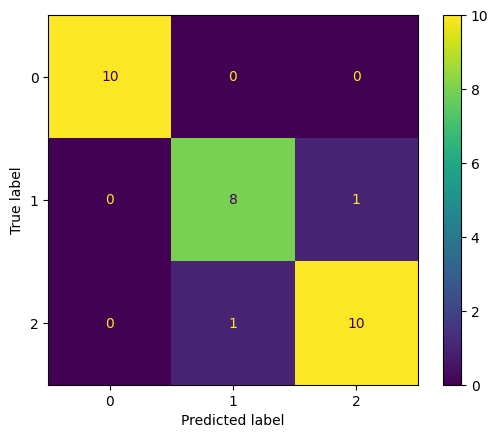

In [ ]:
# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot()
plt.show()

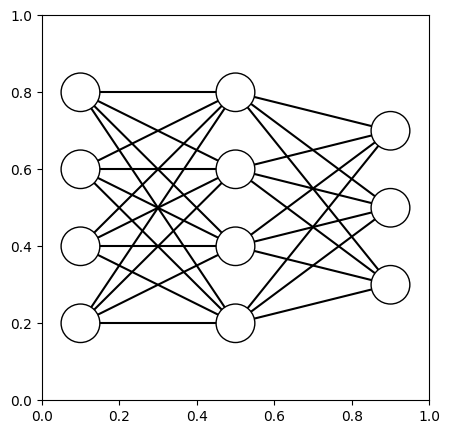

In [ ]:
#Ploting the graph of multi layer network (using matplotlib)
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

layer_sizes = [4, 4, 3]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()

#Experiment No.6
#####AIM: Write a program to implement feed forward network

In [ ]:
import numpy as np

In [ ]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivatives_sigmoid(x):
    return x * (1 - x)

In [ ]:
# Input and actual output
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([[1], [1], [0]])

In [ ]:
# Parameters
epoch = 5000  # number of training iterations
lr = 0.1  # learning rate
inputlayer_neurons = X.shape[1]  # number of input features
hiddenlayer_neurons = 3  # number of hidden layer neurons
output_neurons = 1  # number of output layer neurons

In [ ]:
# Initialize weights and biases
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

In [ ]:
# Training process
for i in range(epoch):
    # Forward propagation
    hidden_layer_input1 = np.dot(X, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)

    output_layer_input1 = np.dot(hiddenlayer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)

    # Backpropagation
    E = y - output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)

    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

    # Updating weights and biases
    wout += hiddenlayer_activations.T.dot(d_output) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hiddenlayer) * lr
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr

In [ ]:
# After training, print the input, actual output, and output from the model
print('Input:')
print(X)

print('Actual Output:')
print(y)

print('Output from the model after training:')
print(output)

Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]
Actual Output:
[[1]
 [1]
 [0]]
Output from the model after training:
[[0.98333453]
 [0.97041078]
 [0.04921572]]


#Experiment No.7
#####AIM: Write a program to build a neural network implementing back propagation network.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Load dataset and preprocess
data = load_iris()
X = data.data  # 4 input features
y = data.target.reshape(-1, 1)

In [ ]:
# One hot encoding for the target variable
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize parameters
input_neurons = X_train.shape[1]  # 4 input features
hidden_neurons = 10  # Number of hidden layer neurons
output_neurons = 3  # Number of output layer neurons (3 classes)

In [ ]:
# Initialize weights and biases with random values
wh = np.random.uniform(size=(input_neurons, hidden_neurons))
bh = np.random.uniform(size=(1, hidden_neurons))
wout = np.random.uniform(size=(hidden_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

In [ ]:
# Hyperparameters
epochs = 5000  # Number of training iterations
learning_rate = 0.01

In [ ]:
# Training process
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, wh) + bh
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, wout) + bout
    output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_train - output
    slope_output_layer = sigmoid_derivative(output)
    slope_hidden_layer = sigmoid_derivative(hidden_layer_output)

    d_output = error * slope_output_layer
    error_hidden_layer = d_output.dot(wout.T)
    d_hidden_layer = error_hidden_layer * slope_hidden_layer

    # Update weights and biases
    wout += hidden_layer_output.T.dot(d_output) * learning_rate
    bout += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    wh += X_train.T.dot(d_hidden_layer) * learning_rate
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

In [ ]:
# Testing the model
hidden_layer_input = np.dot(X_test, wh) + bh
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, wout) + bout
output = sigmoid(output_layer_input)

In [ ]:
# Predictions
predictions = np.argmax(output, axis=1)
true_labels = np.argmax(y_test, axis=1)

In [ ]:
# Calculate accuracy
accuracy = np.mean(predictions == true_labels) * 100

In [ ]:
# Output the first 30 results
print("Model Predictions vs True Labels (First 30 Samples)")
print("-" * 50)
for i in range(min(30, len(predictions))):  # Print only up to 30 samples
    print(f"Sample {i + 1}: Predicted: {predictions[i]}, True Label: {true_labels[i]}")
print("-" * 50)
print(f"Accuracy of the model on test data: {accuracy:.2f}%")

Model Predictions vs True Labels (First 30 Samples)
--------------------------------------------------
Sample 1: Predicted: 1, True Label: 1
Sample 2: Predicted: 0, True Label: 0
Sample 3: Predicted: 2, True Label: 2
Sample 4: Predicted: 1, True Label: 1
Sample 5: Predicted: 1, True Label: 1
Sample 6: Predicted: 0, True Label: 0
Sample 7: Predicted: 0, True Label: 1
Sample 8: Predicted: 2, True Label: 2
Sample 9: Predicted: 2, True Label: 1
Sample 10: Predicted: 1, True Label: 1
Sample 11: Predicted: 2, True Label: 2
Sample 12: Predicted: 0, True Label: 0
Sample 13: Predicted: 0, True Label: 0
Sample 14: Predicted: 0, True Label: 0
Sample 15: Predicted: 0, True Label: 0
Sample 16: Predicted: 1, True Label: 1
Sample 17: Predicted: 2, True Label: 2
Sample 18: Predicted: 1, True Label: 1
Sample 19: Predicted: 1, True Label: 1
Sample 20: Predicted: 2, True Label: 2
Sample 21: Predicted: 0, True Label: 0
Sample 22: Predicted: 2, True Label: 2
Sample 23: Predicted: 0, True Label: 0
Sample 24

#Experiment No.8
#####AIM: Write a program to implement an Autoencoder.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# Flattening the 28x28 images into vectors of size 784 (28*28)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
# Build the Autoencoder model
input_dim = x_train.shape[1]  # Input size (784)
encoding_dim = 32  # Size of the latent space

In [ ]:

# Define the input layer
input_img = Input(shape=(input_dim,))

# Define the encoder layer (reduce dimension)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoder layer (reconstruct the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define the encoder model (for encoding input images into the latent space)
encoder = Model(input_img, encoded)

In [ ]:
# Define the decoder model (for decoding latent space representation to reconstruct images)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Use the last layer of the autoencoder for decoding
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3840 - val_loss: 0.1890
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1789 - val_loss: 0.1527
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1485 - val_loss: 0.1340
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1322 - val_loss: 0.1223
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1216 - val_loss: 0.1140
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1137 - val_loss: 0.1079
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1081 - val_loss: 0.1032
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1036 - val_loss: 0.0997
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1004 - val_loss: 0.0971
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0980 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0964 - val_loss: 0.0943
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s

In [ ]:
# Visualize the results
# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


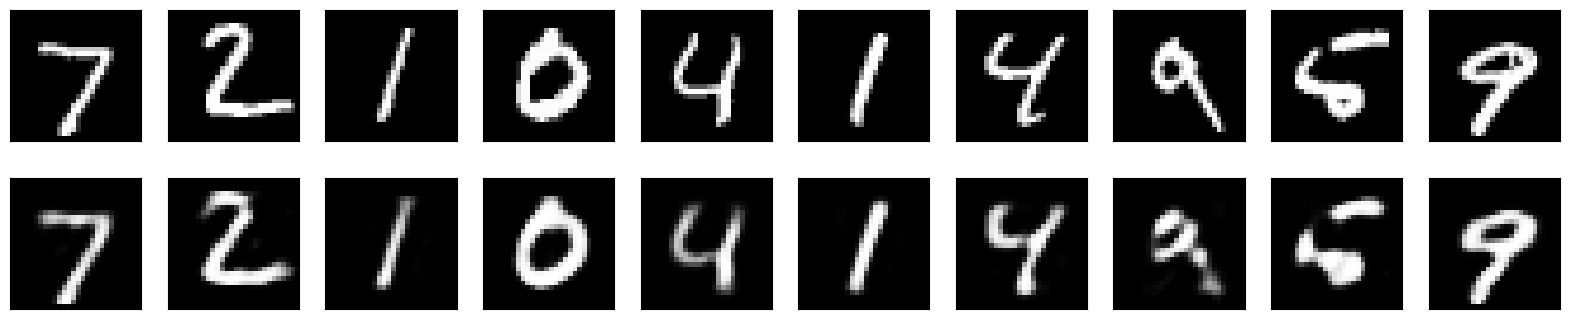

In [ ]:
# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Experiment No.9
#####AIM: Write a program to implement a Recurrent Neural Network (RNN).

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
# Load and preprocess the IMDB dataset
max_features = 10000  # Number of words to consider as features
max_len = 500  # Cut texts after this number of words (pad/truncate)
batch_size = 32

In [ ]:
# Load data, keeping only the top 'max_features' most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Pad sequences to ensure all are of the same length
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(max_len, 1)))  # SimpleRNN layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Reshape data to match input shape (samples, time steps, features)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.5041 - loss: 0.6961 - val_accuracy: 0.5028 - val_loss: 0.6934
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.5024 - loss: 0.6940 - val_accuracy: 0.5062 - val_loss: 0.6951
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.4996 - loss: 0.6944 - val_accuracy: 0.5074 - val_loss: 0.6934
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.5119 - loss: 0.6936 - val_accuracy: 0.5004 - val_loss: 0.6942
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.5100 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6968
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.5141 - loss: 0.6936 - val_accuracy: 0.5038 - val_loss: 0.6945
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.5073 - loss: 0.6927 - val_accuracy: 0.4946 - val_loss: 0.6963
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 122ms/step - accuracy: 0.5046 - loss: 0.6936 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5030 - loss: 0.6943
Test Loss: 0.6939876675605774, Test Accuracy: 0.5070800185203552


#Experiment No.10
#####AIM: Write a program to implement Generative Adversarial Networks (GANs) using genetic algorithms.

In [ ]:
!pip install deap

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

In [ ]:
# Define GAN Components
def build_generator(latent_dim):
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(28 * 28 * 1, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return model

In [ ]:
def build_discriminator(img_shape):
    model = Sequential([
        Flatten(input_shape=img_shape),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=3)  # Reshape to (28, 28, 1)

In [ ]:
# Build the GAN Model
latent_dim = 100
img_shape = (28, 28, 1)

generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = tf.keras.Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)

combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Train the GAN
def train_gan(epochs, batch_size=64, save_interval=100):
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_imgs = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))

        g_loss = combined.train_on_batch(noise, valid_y)

        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | Acc.: {100 * d_loss[1]:.2f}] [G loss: {g_loss}]")
            plot_generated_images(generator)

In [ ]:
# Visualize the Results
def plot_generated_images(generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
0 [D loss: 1.2050470113754272 | Acc.: 38.28] [G loss: [array(1.0141089, dtype=float32), array(1.0141089, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


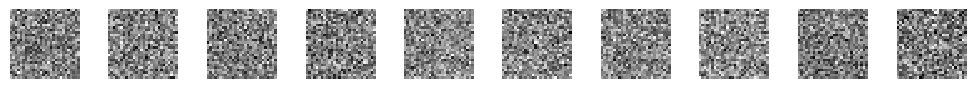

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10 [D loss: 1.164168119430542 | Acc.: 28.64] [G loss: [array(1.1721512, dtype=float32), array(1.1721512, dtype=float32), array(0.28267047, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


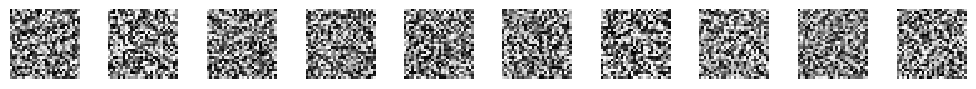

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
20 [D loss: 1.4000458717346191 | Acc.: 22.12] [G loss: [array(1.4119596, dtype=float32), array(1.4119596, dtype=float32), array(0.21875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


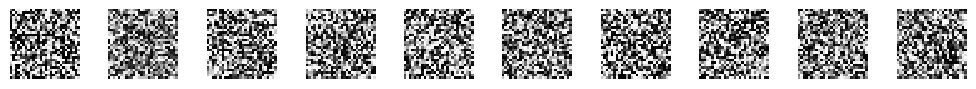

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
30 [D loss: 1.6058233976364136 | Acc.: 19.20] [G loss: [array(1.6180403, dtype=float32), array(1.6180403, dtype=float32), array(0.19052419, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


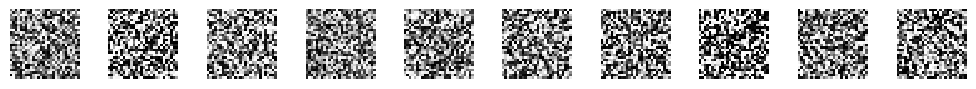

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
40 [D loss: 1.7875406742095947 | Acc.: 17.03] [G loss: [array(1.7973753, dtype=float32), array(1.7973753, dtype=float32), array(0.16920732, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


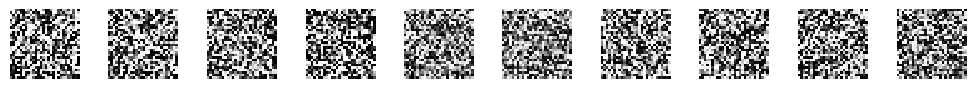

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Train the GAN for 50 epochs
train_gan(epochs=50, batch_size=64, save_interval=10)